<a href="https://colab.research.google.com/github/lynguyenp/Mushroom-Classification-Tree/blob/main/Mushroom_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. ENVIRONMENT PREPARATION**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from graphviz import Digraph


**II. DATA LOADING**

In [17]:
secondary_path = "/content/drive/MyDrive/3. MSc. Data Science & Economics/5. Machine Learning - Statistical Learning/1. Machine Learning/3. Exam/2. Project/01 Data/secondary_data.csv"
mushroom = pd.read_csv(secondary_path, delimiter=';')

In [18]:
mushroom

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


**III. DATA PREPROCESSING AND EXPLORATY ANALYSIS**

In [19]:
mushroom.shape

(61069, 21)

In [20]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [22]:
mushroom.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [24]:
mushroom.dtypes

,0
class,object
cap-diameter,float64
cap-shape,object
cap-surface,object
cap-color,object
does-bruise-or-bleed,object
gill-attachment,object
gill-spacing,object
gill-color,object
stem-height,float64


In [25]:
for col in mushroom.columns:
    unique_vals = mushroom[col].unique()
    try:
        sorted_vals = sorted(unique_vals)
    except TypeError:
        sorted_vals = unique_vals
    print(f"{col}: {sorted_vals}")

class: ['e', 'p']
cap-diameter: [np.float64(0.38), np.float64(0.44), np.float64(0.47), np.float64(0.48), np.float64(0.49), np.float64(0.5), np.float64(0.51), np.float64(0.52), np.float64(0.53), np.float64(0.54), np.float64(0.55), np.float64(0.56), np.float64(0.57), np.float64(0.58), np.float64(0.59), np.float64(0.6), np.float64(0.61), np.float64(0.62), np.float64(0.63), np.float64(0.64), np.float64(0.65), np.float64(0.66), np.float64(0.67), np.float64(0.68), np.float64(0.69), np.float64(0.7), np.float64(0.71), np.float64(0.72), np.float64(0.73), np.float64(0.74), np.float64(0.75), np.float64(0.76), np.float64(0.77), np.float64(0.78), np.float64(0.79), np.float64(0.8), np.float64(0.81), np.float64(0.82), np.float64(0.83), np.float64(0.84), np.float64(0.85), np.float64(0.86), np.float64(0.87), np.float64(0.88), np.float64(0.89), np.float64(0.9), np.float64(0.91), np.float64(0.92), np.float64(0.93), np.float64(0.94), np.float64(0.95), np.float64(0.96), np.float64(0.97), np.float64(0.98), 

In [27]:
# Curious crosstab
season_class_crosstab = pd.crosstab(mushroom['habitat'], mushroom['class']) # change the feature to see class(es) a value may belong to.
season_class_crosstab

class,e,p
habitat,,
d,20163,24046
g,2489,5454
h,696,1305
l,1938,1230
m,1427,1493
p,0,360
u,115,0
w,353,0


In [30]:
# Duplicate counting
duplicates = mushroom.duplicated()
count_duplicates = duplicates.sum()
print("Number of dublicates: ", count_duplicates)

# Duplicate removal
mushroom = mushroom.drop_duplicates()

# Mushroom count
print("Number of entries after duplicate removal: ", len(mushroom))

Number of dublicates:  146
Number of entries after duplicate removal:  60923


In [31]:
# Missing data
col_missing_data = mushroom.isna().sum()
print("Number of missing values per column:",col_missing_data)

total_missing_data = mushroom.isna().sum().sum()
print("Total missing values:", total_missing_data)

mushroom.fillna('unidentified', inplace=True)

Number of missing values per column: class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64
Total missing values: 307019


<ipython-input-31-ce38c844d02a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushroom.fillna('unidentified', inplace=True)


Class Distribution:
 class
p    33742
e    27181
Name: count, dtype: int64
Class Proportions:
 class
p    55.384666
e    44.615334
Name: count, dtype: float64


<ipython-input-32-3faed926477f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=mushroom, palette=custom_palette)


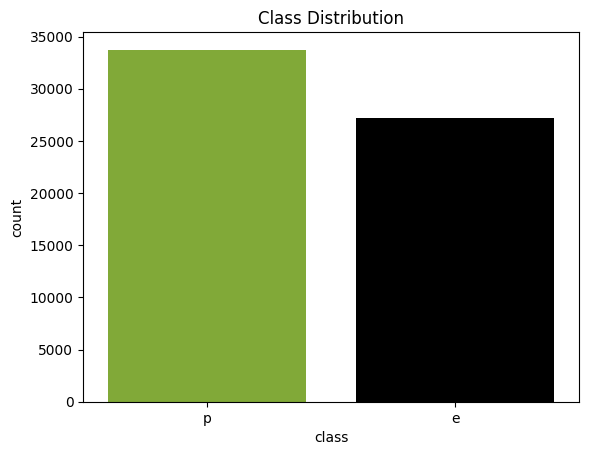

In [32]:
# Binary class distribution
class_distribution = mushroom['class'].value_counts()
class_proportions = class_distribution / len(mushroom) * 100
print("Class Distribution:\n", class_distribution)
print("Class Proportions:\n", class_proportions)

custom_palette = ['#86BC25', '#000000']
sns.countplot(x='class', data=mushroom, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

**IV. MODEL BUIDING & TRAINING**



1.   Creating a basic class for the nodes
2.   Creating a class for the binary classification tree

Satisfying the following requirements:


*   At least three splitting criteria: Gini, Entropy, Misclassification
*   At least two stopping criteria: Max depth, Min samples
*   Hyperparameter tuning on at least one tree
*   Computing training error (1-0 loss)







In [4]:
# Node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, prediction=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.prediction = prediction

In [5]:
# Decision Tree
class DecisionTree:
    def __init__(self, criterion="gini", max_depth=5, min_samples=5):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.root = None

    def fit(self, X, y):
        self.features = X.columns
        self.root = self.tree_construction(X, y, 0)

    def tree_construction(self, X, y, depth):
        if len(set(y)) == 1 or len(y) < self.min_samples or depth >= self.max_depth:
            return Node(prediction=self.majority_class(y))

        best_gain = -1
        best_feature = None
        best_threshold = None
        best_splits = None

        for feature in X.columns:
            values = X[feature].unique()
            for val in values:
                left_mask = X[feature] == val
                right_mask = ~left_mask
                y_left, y_right = y[left_mask], y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gain = self.information_gain(y, y_left, y_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = val
                    best_splits = (X[left_mask], y[left_mask], X[right_mask], y[right_mask])

        if best_gain == -1:
            return Node(prediction=self.majority_class(y))

        left = self.tree_construction(best_splits[0], best_splits[1], depth + 1)
        right = self.tree_construction(best_splits[2], best_splits[3], depth + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right, gain=best_gain)

    def majority_class(self, y):
        return Counter(y).most_common(1)[0][0]

    def gini_criterion(self, y):
        counts = Counter(y)
        impurity = 1.0
        for label in counts:
            prob = counts[label] / len(y)
            impurity -= prob ** 2
        return impurity

    def entropy_criterion(self, y):
        counts = Counter(y)
        total = len(y)
        return -sum((count/total) * np.log2(count/total) for count in counts.values())

    def misclass_criterion(self, y):
        counts = Counter(y)
        return 1 - max(counts.values()) / len(y)

    def information_gain(self, y, y_left, y_right):
        if self.criterion == "gini":
            H = self.gini_criterion
        elif self.criterion == "entropy":
            H = self.entropy_criterion
        elif self.criterion == "misclass_criterion":
            H = self.misclass_criterion
        else:
            raise ValueError("Invalid criterion")

        p = len(y_left) / len(y)
        return H(y) - (p * H(y_left) + (1 - p) * H(y_right))

    def predict(self, X):
        return X.apply(self.predict_one, axis=1)

    def predict_one(self, x):
        node = self.root
        while node.left:
            if x[node.feature] == node.threshold:
                node = node.left
            else:
                node = node.right
        return node.prediction

    def training_error(self, X, y):
        return np.mean(self.predict(X) != y)

    def test_error(self, X, y):
        return self.training_error(X, y)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return {
            "accuracy": accuracy_score(y, y_pred),
            "precision": precision_score(y, y_pred, pos_label='e'),
            "recall": recall_score(y, y_pred, pos_label='e'),
            "f1": f1_score(y, y_pred, pos_label='e')
        }

    def graphical_tree(self):
        dot = Digraph()

        def add_nodes(node, node_id):
            if node.left is None and node.right is None:
                dot.node(str(node_id), f'Predict: {node.prediction}', shape='box')
                return

            label = f'{node.feature} = {node.threshold}\nGain={node.gain:.3f}'
            dot.node(str(node_id), label)

            left_id = f"{node_id}L"
            right_id = f"{node_id}R"

            dot.edge(str(node_id), str(left_id), label="True")
            dot.edge(str(node_id), str(right_id), label="False")

            add_nodes(node.left, left_id)
            add_nodes(node.right, right_id)

        add_nodes(self.root, "0")
        return dot

**V. MODEL TRAINING AND EVALUATING**

In [6]:
from sklearn.datasets import fetch_openml
mushroom = fetch_openml(name='mushroom', version=1, as_frame=True)
df = mushroom.frame

In [33]:
df = mushroom.copy()

In [34]:
# Split data with stratification to ensure that each dataset retains balanced class
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_holder, y_train, y_holder = train_test_split(X, y, test_size=0.4, stratify=y, random_state=17)
X_val, X_test, y_val, y_test = train_test_split(X_holder, y_holder, test_size=0.5, stratify=y_holder, random_state=17)


In [35]:
# Train three trees
criteria = ["gini", "entropy", "misclass_criterion"]
trees = {}
print("--- Training trees with different Criteria ---")
for crit in criteria:
    tree = DecisionTree(criterion=crit, max_depth=5, min_samples=40)
    tree.fit(X_train, y_train)
    print(f"\nCriterion: {crit}")
    print(f"Train error: {tree.training_error(X_train, y_train):.4f}")
    print(f"Test error: {tree.test_error(X_test, y_test):.4f}")
    print("Performance on test set:", tree.evaluate(X_test, y_test))
    dot = tree.graphical_tree()
    dot.render(f"tree_{crit}", format="png")
    trees[crit] = tree

--- Training trees with different Criteria ---

Criterion: gini
Train error: 0.2490
Test error: 0.2492
Performance on test set: {'accuracy': 0.7508411981945015, 'precision': 0.7912621359223301, 'recall': 0.5997056659308315, 'f1': 0.6822938467978233}

Criterion: entropy
Train error: 0.2561
Test error: 0.2546
Performance on test set: {'accuracy': 0.7454247025030776, 'precision': 0.6890184645286687, 'recall': 0.782560706401766, 'f1': 0.7328165374677003}

Criterion: misclass_criterion
Train error: 0.2224
Test error: 0.2225
Performance on test set: {'accuracy': 0.7775133360689372, 'precision': 0.7305804704687764, 'recall': 0.7941501103752759, 'f1': 0.7610401057734685}


In [36]:
# Hyperparameter tuning for Gini tree
print("\n--- Hyperparameter Tuning for Gini ---")
best_score = 0
best_tree = None
best_params = None

for max_depth in [3, 7, 11]:
    for min_samples in [5, 60, 360]:
        tree = DecisionTree(criterion="gini", max_depth=max_depth, min_samples=min_samples)
        tree.fit(X_train, y_train)
        metrics = tree.evaluate(X_val, y_val)
        score = metrics["accuracy"]
        print(f"max_depth={max_depth}, min_samples={min_samples}, val acc={score:.4f}")
        if score > best_score:
            best_score = score
            best_tree = tree
            best_params = (max_depth, min_samples)


--- Hyperparameter Tuning for Gini ---
max_depth=3, min_samples=5, val acc=0.7041
max_depth=3, min_samples=60, val acc=0.7041
max_depth=3, min_samples=360, val acc=0.7041
max_depth=7, min_samples=5, val acc=0.8182
max_depth=7, min_samples=60, val acc=0.8182
max_depth=7, min_samples=360, val acc=0.8149
max_depth=11, min_samples=5, val acc=0.9485
max_depth=11, min_samples=60, val acc=0.9485
max_depth=11, min_samples=360, val acc=0.9389


In [38]:
# Best tree
print("\n--- Best Gini Tree on Test Set ---")
print(f"Best params: max_depth={best_params[0]}, min_samples={best_params[1]}")
print(f"Train error: {best_tree.training_error(X_train, y_train):.4f}")
print(f"Test error: {best_tree.test_error(X_test, y_test):.4f}")
print("Test performance:", best_tree.evaluate(X_test, y_test))

# Visualize best tree
dot = best_tree.graphical_tree()
dot.render("best_pick_gini_tree", format="png")


--- Best Gini Tree on Test Set ---
Best params: max_depth=11, min_samples=5
Train error: 0.0550
Test error: 0.0533
Test performance: {'accuracy': 0.9467377923676652, 'precision': 0.9818804107106905, 'recall': 0.8971670345842532, 'f1': 0.937614149764491}


'best_pick_gini_tree.png'

**VI. EXTRA VALIDATION (OPTIONAL)**

In [39]:
# Validating root node information gain
def root_node_check(tree, X, y):
    print(f"\n--- Feature gains at root (criterion: {tree.criterion}) ---")
    root_gains = []
    for feature in X.columns:
        values = X[feature].unique()
        for val in values:
            left_mask = X[feature] == val
            right_mask = ~left_mask
            y_left, y_right = y[left_mask], y[right_mask]

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gain = tree.information_gain(y, y_left, y_right)
            root_gains.append((feature, val, gain))

    # Sort and show top by gain
    root_gains.sort(key=lambda x: x[2], reverse=True)
    for feature, val, gain in root_gains[:10]:  # show top 10
        print(f"Feature: {feature} = {val}, Gain: {gain:.4f}")

# Example usage after fitting one tree
root_node_check(trees["gini"], X_train, y_train)



--- Feature gains at root (criterion: gini) ---
Feature: stem-color = w, Gain: 0.0194
Feature: gill-attachment = p, Gain: 0.0147
Feature: ring-type = z, Gain: 0.0140
Feature: stem-surface = g, Gain: 0.0116
Feature: cap-surface = k, Gain: 0.0114
Feature: cap-shape = b, Gain: 0.0103
Feature: stem-root = r, Gain: 0.0095
Feature: gill-color = w, Gain: 0.0088
Feature: gill-color = n, Gain: 0.0074
Feature: cap-color = e, Gain: 0.0069
